# Coffee Shop Analysis
### This is data from a random coffee shop found on Kaggle. This project shows my skills in Data Exploration, Cleaning, Imputation, Visualization, and Machine Learning using Association Rule Mining and Simple Linear Regression. You can scroll down all the way to skip to the visualizations.

## Loading and Exploring Data

In [1]:
import pandas as pd

In [2]:
df_ingredients = pd.read_csv('ingredients.csv')
df_inventory = pd.read_csv('inventory.csv')
df_items = pd.read_csv('items.csv')
df_orders = pd.read_csv('orders.csv')
df_recipe = pd.read_csv('recipe.csv')
df_rota = pd.read_csv('rota.csv')
df_shift = pd.read_csv('shift.csv')
df_staff = pd.read_csv('staff.csv')

In [3]:
print("Ingredients:")
print(df_ingredients.head())
print("\nInventory:")
print(df_inventory.head())
print("\nItems:")
print(df_items.head())
print("\nOrders:")
print(df_orders.head())
print("\nRecipe:")
print(df_recipe.head())
print("\nRota:")
print(df_rota.head())
print("\nShift:")
print(df_shift.head())
print("\nStaff:")
print(df_staff.head())

Ingredients:
   ing_id        ing_name  ing_weight ing_meas  ing_price
0  ING001  Espresso beans        1000    grams      12.00
1  ING002      Whole Milk        1000       ml       1.20
2  ING003         Cheddar         500    grams       7.45
3  ING004      Mozzarella         500    grams       5.00
4  ING005   Whipped cream         300       ml       1.35

Inventory:
   inv_id  ing_id  quantity
0  inv001  ING001         4
1  inv002  ING002        55
2  inv003  ING003         1
3  inv004  ING004         4
4  inv005  ING005         7

Items:
  item_id         sku   item_name    item_cat item_size  item_price
0   It001  HDR-CAP-MD  Cappuccino  Hot Drinks    Medium        3.45
1   It002  HDR-CAP-LG  Cappuccino  Hot Drinks     Large        3.75
2   It003  HDR-LAT-MD       Latte  Hot Drinks    Medium        3.45
3   It004  HDR-LAT-LG       Latte  Hot Drinks     Large        3.75
4   It005     HDR-FLT  Flat White  Hot Drinks       NaN        3.15

Orders:
   row_id order_id           creat

In [4]:
print("Data Types and Missing Values:")
print(df_ingredients.info())
print(df_inventory.info())
print(df_items.info())
print(df_orders.info())
print(df_recipe.info())
print(df_rota.info())
print(df_shift.info())
print(df_staff.info())

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ing_id      18 non-null     object 
 1   ing_name    18 non-null     object 
 2   ing_weight  18 non-null     int64  
 3   ing_meas    18 non-null     object 
 4   ing_price   18 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 852.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   inv_id    18 non-null     object
 1   ing_id    18 non-null     object
 2   quantity  18 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 564.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------  

## Imputing using Mode Imputation

In [5]:
mode_in_or_out = df_orders['in_or_out'].mode()[0]
df_orders.loc[df_orders['in_or_out'].isnull(), 'in_or_out'] = mode_in_or_out

In [6]:
print(df_orders['in_or_out'].value_counts())

in_or_out
out    260
in     203
        58
Name: count, dtype: int64


In [7]:
null_item_sizes = df_items[df_items['item_size'].isnull()]
print(null_item_sizes)

   item_id      sku                   item_name    item_cat item_size  \
4    It005  HDR-FLT                  Flat White  Hot Drinks       NaN   
7    It008  HDR-ESP                    Espresso  Hot Drinks       NaN   
22   It023  SNK-SHC         Sandwich Ham&Cheese      Snacks       NaN   
23   It024  SNK-SSM  Sandwich Salami&Mozzarella      Snacks       NaN   

    item_price  
4         3.15  
7         2.15  
22        5.60  
23        5.50  


In [8]:
df_items['item_name'].unique()

array(['Cappuccino', 'Latte', 'Flat White', 'Caramel Macchiato',
       'Espresso', 'Mocha', 'White Mocha', 'Hot Chocolate', 'Cold Coffee',
       'Cold Mocha', 'Iced Tea', 'Lemonade', 'Sandwich Ham&Cheese',
       'Sandwich Salami&Mozzarella'], dtype=object)

In [9]:
item_name_counts = df_items['item_name'].value_counts()
print(item_name_counts)

item_name
Cappuccino                    2
Latte                         2
Caramel Macchiato             2
Mocha                         2
White Mocha                   2
Hot Chocolate                 2
Cold Coffee                   2
Cold Mocha                    2
Iced Tea                      2
Lemonade                      2
Flat White                    1
Espresso                      1
Sandwich Ham&Cheese           1
Sandwich Salami&Mozzarella    1
Name: count, dtype: int64


In [10]:
df_items['item_size'].unique()

array(['Medium', 'Large', nan], dtype=object)

#### Since items can only be medium or large, and there's two of each item except our null rows, it would be best to impute them with 'Medium'. In most cases, Medium is the standard size.

In [11]:
df_items.loc[df_items['item_size'].isnull(), 'item_size'] = 'Medium'
print(df_items[df_items['item_size'].isnull()])

Empty DataFrame
Columns: [item_id, sku, item_name, item_cat, item_size, item_price]
Index: []


## Quick ERD to see Variable Relationships

![ERD of Coffee Store Dataset](ERD.png)

## Changing column names to standardize relationships (i.e., 'sku' in Items table is 'recipe_id' in Recipe table)

In [12]:
df_items.rename(columns={'sku': 'recipe_id'}, inplace=True)
df_items.head(3)

,item_id,recipe_id,item_name,item_cat,item_size,item_price
0,It001,HDR-CAP-MD,Cappuccino,Hot Drinks,Medium,3.45
1,It002,HDR-CAP-LG,Cappuccino,Hot Drinks,Large,3.75
2,It003,HDR-LAT-MD,Latte,Hot Drinks,Medium,3.45


In [13]:
df_orders['created_at'] = pd.to_datetime(df_orders['created_at'], format='%Y-%m-%d %H:%M:%S')
df_orders['date'] = df_orders['created_at'].dt.date
df_orders['time'] = df_orders['created_at'].dt.time
df_orders.head(3)

,row_id,order_id,created_at,item_id,quantity,cust_name,in_or_out,date,time
0,1,ORD001,2024-02-12 07:04:19,It008,1,Alex,out,2024-02-12,07:04:19
1,2,ORD002,2024-02-12 07:09:38,It014,1,Jordan,in,2024-02-12,07:09:38
2,3,ORD003,2024-02-12 07:14:29,It008,1,Taylor,out,2024-02-12,07:14:29


## Visualizations

In [52]:
import matplotlib.pyplot as plt
import numpy as np

#### Importing SQL queries into Python to fetch data easier from multiple tables

In [20]:
import sqlite3
conn = sqlite3.connect(':memory:')
df_ingredients.to_sql('ingredients', conn, index=False, if_exists='replace')
df_inventory.to_sql('inventory', conn, index=False, if_exists='replace')
df_items.to_sql('items', conn, index=False, if_exists='replace')
df_orders.to_sql('orders', conn, index=False, if_exists='replace')
df_recipe.to_sql('recipe', conn, index=False, if_exists='replace')
df_rota.to_sql('rota', conn, index=False, if_exists='replace')
df_shift.to_sql('shift', conn, index=False, if_exists='replace')
df_staff.to_sql('staff', conn, index=False, if_exists='replace')

4

### What are the most profitable items?

#### Since there is no cost given, I had to calculate it. To do this, I took the ing_price divided by ing_weight, giving price/ing_meas (gram or ml). Then, I multiplied this by the quantity and summed up all the prices to get the total cost of each item. I further expanded to add the Profit per item. I used this to plot the 5 most profitable items based on ingredient cost.

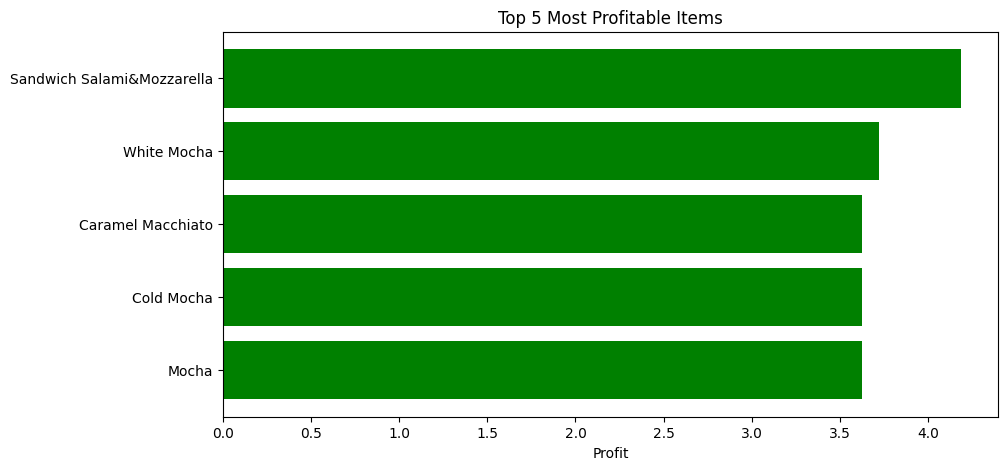

In [21]:
query = """
SELECT 
    R.recipe_id, 
    IT.item_name, 
    IT.item_price, 
    IT.item_size, 
    SUM((I.ing_price / I.ing_weight) * R.quantity) AS Total_Cost, 
    IT.item_price - SUM((I.ing_price / I.ing_weight) * R.quantity) AS Profit
FROM 
    [ingredients] AS I 
JOIN 
    [recipe] AS R ON I.ing_id = R.ing_id 
JOIN 
    [items] AS IT ON R.recipe_id = IT.recipe_id
GROUP BY 
    IT.item_name
"""
df_query = pd.read_sql_query(query, conn)
df_query

top_5_items = df_query.sort_values(by='Profit', ascending=False).head(5)
plt.figure(figsize=(10, 5))  
plt.barh(top_5_items['item_name'], top_5_items['Profit'], color='green')  
plt.xlabel('Profit')  
plt.title('Top 5 Most Profitable Items')  
plt.gca().invert_yaxis()  
plt.show()

### What are the most profitable and least profitable items?

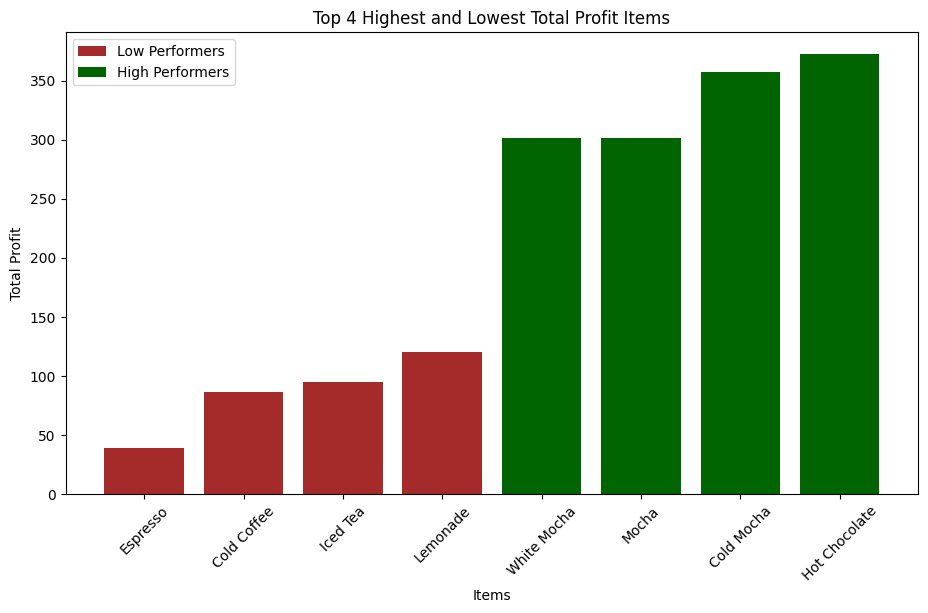

In [18]:
query = """
SELECT 
    IT.item_id,
    IT.item_name,
    IT.item_size,
    SUM((IT.item_price - (I.ing_price / I.ing_weight) * R.quantity) * O.quantity) AS Total_Profit
FROM 
    ingredients AS I 
JOIN 
    recipe AS R ON I.ing_id = R.ing_id 
JOIN 
    items AS IT ON R.recipe_id = IT.recipe_id
JOIN 
    orders AS O ON IT.item_id = O.item_id
GROUP BY 
    IT.item_id, 
    IT.item_name, 
    IT.item_size
"""
df_query = pd.read_sql_query(query, conn)
df_query

sorted_df = df_query.sort_values(by='Total_Profit')
low_prof = sorted_df.head(4)
high_prof = sorted_df.tail(4)
plot_data = pd.concat([low_prof, high_prof])

plt.figure(figsize=(11, 6))
plt.bar(low_prof['item_name'], low_prof['Total_Profit'], color='brown', label='Low Performers')
plt.bar(high_prof['item_name'], high_prof['Total_Profit'], color='darkgreen', label='High Performers')
plt.title('Top 4 Highest and Lowest Total Profit Items')
plt.xlabel('Items')
plt.ylabel('Total Profit')
plt.legend()
plt.xticks(rotation=45)  
plt.show()

### What is the profit and cost (ingredient and labor) per day?

In [40]:
query = """
SELECT *   
FROM 
    rota AS RO
JOIN
    shift AS S ON RO.shift_id = S.shift_id
JOIN
    staff AS ST ON RO.staff_id = ST.staff_id

"""
df_query = pd.read_sql_query(query, conn)
df_query

,row_id,rota_id,date,shift_id,staff_id,shift_id,day_of_week,start_time,end_time,staff_id,first_name,last_name,position,sal_per_hour
0,1,RT001,2024-02-12,SH001,ST001,SH001,Monday,07:00:00,13:00:00,ST001,Emma,Johnson,Barista,10.0
1,2,RT001,2024-02-12,SH001,ST003,SH001,Monday,07:00:00,13:00:00,ST003,Olivia,Williams,Barista,10.0
2,3,RT001,2024-02-12,SH002,ST001,SH002,Monday,13:00:00,17:00:00,ST001,Emma,Johnson,Barista,10.0
3,4,RT002,2024-02-13,SH003,ST002,SH003,Tuesday,07:00:00,13:00:00,ST002,Liam,Smith,Barista,10.0
4,5,RT002,2024-02-13,SH003,ST004,SH003,Tuesday,07:00:00,13:00:00,ST004,Noah,Brown,Barista,10.0
5,6,RT002,2024-02-13,SH004,ST002,SH004,Tuesday,13:00:00,17:00:00,ST002,Liam,Smith,Barista,10.0
6,7,RT003,2024-02-14,SH005,ST001,SH005,Wednesday,07:00:00,13:00:00,ST001,Emma,Johnson,Barista,10.0
7,8,RT003,2024-02-14,SH005,ST003,SH005,Wednesday,07:00:00,13:00:00,ST003,Olivia,Williams,Barista,10.0
8,9,RT003,2024-02-14,SH006,ST003,SH006,Wednesday,13:00:00,17:00:00,ST003,Olivia,Williams,Barista,10.0
9,10,RT004,2024-02-15,SH007,ST002,SH007,Thursday,07:00:00,13:00:00,ST002,Liam,Smith,Barista,10.0


#### Looks like $160 is the fixed labor cost per day for these 6 days. I tried calculating it using a query but it kept giving me trouble due to the format of the date.

In [51]:
query = """
SELECT 
    O.date AS SaleDate,
    SUM(O.quantity) AS Total_Products_Sold, -- Corrected to sum the quantity of products sold per day
    SUM(IT.item_price * O.quantity) AS Total_Revenue, -- Total revenue generated from sales
    SUM((I.ing_price / I.ing_weight) * R.quantity * O.quantity) AS Total_Ingredient_Cost, -- Total cost of ingredients used
    160 AS Total_Labor_Cost, -- Fixed labor cost per day
    SUM(IT.item_price * O.quantity) - SUM((I.ing_price / I.ing_weight) * R.quantity * O.quantity) - 160 AS Net_Profit -- Final profit after subtracting costs
FROM 
    ingredients AS I 
JOIN 
    recipe AS R ON I.ing_id = R.ing_id 
JOIN 
    items AS IT ON R.recipe_id = IT.recipe_id
JOIN 
    orders AS O ON IT.item_id = O.item_id
GROUP BY 
    O.date
"""
df_query = pd.read_sql_query(query, conn)
df_query

,SaleDate,Total_Products_Sold,Total_Revenue,Total_Ingredient_Cost,Total_Labor_Cost,Net_Profit
0,2024-02-12,289,1182.30,58.48605,160,963.81395
1,2024-02-13,182,755.10,38.51075,160,556.58925
2,2024-02-14,154,644.50,31.49240,160,453.00760
3,2024-02-15,168,693.30,34.83695,160,498.46305
4,2024-02-16,176,728.65,36.83965,160,531.81035
5,2024-02-17,214,899.00,47.12045,160,691.87955


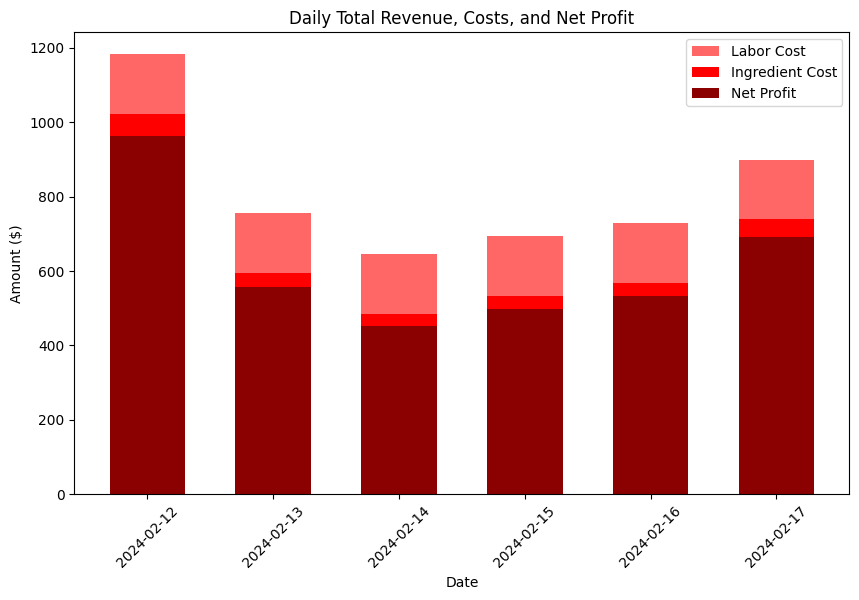

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))
ind = np.arange(len(df_query))

width = 0.60

# Stacked bars for revenue and costs
p1 = ax.bar(ind, df_query['Total_Revenue'], width)
p2 = ax.bar(ind, df_query['Total_Labor_Cost'], width, bottom=df_query['Total_Revenue'] - df_query['Total_Labor_Cost'], label='Labor Cost', color='#FF6666')
p3 = ax.bar(ind, df_query['Total_Ingredient_Cost'], width, bottom=df_query['Total_Revenue'] - df_query['Total_Ingredient_Cost'] - df_query['Total_Labor_Cost'], label='Ingredient Cost', color='#FF0000')
p4 = ax.bar(ind, df_query['Net_Profit'], width, bottom=0, label='Net Profit', color='#8B0000')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Date')
ax.set_ylabel('Amount ($)')
ax.set_title('Daily Total Revenue, Costs, and Net Profit')
ax.set_xticks(ind)
ax.set_xticklabels(df_query['SaleDate'])
ax.legend()

# Rotate date labels for better visibility
plt.xticks(rotation=45)

plt.show()

## Machine Learning : Association Rule Mining

In [91]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

df_merged = pd.merge(df_orders, df_items, on='item_id', how='inner')
orders = df_merged.groupby('order_id')['item_name'].apply(list).tolist()

te = TransactionEncoder()
te_ary = te.fit(orders).transform(orders)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.90)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                   antecedents      consequents   support  confidence  \
0  (Hot Chocolate, Flat White)       (Lemonade)  0.002571         1.0   
1       (Flat White, Lemonade)  (Hot Chocolate)  0.002571         1.0   
2      (Iced Tea, White Mocha)     (Flat White)  0.002571         1.0   

        lift  
0   9.725000  
1  11.114286  
2  14.407407  


In [98]:
frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.10)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                     antecedents                   consequents   support  \
0                  (Cold Coffee)                  (Cappuccino)  0.007712   
1                     (Espresso)                 (Cold Coffee)  0.005141   
2   (Sandwich Salami&Mozzarella)                 (Cold Coffee)  0.005141   
3                   (Cold Mocha)                    (Lemonade)  0.017995   
4                     (Lemonade)                  (Cold Mocha)  0.017995   
5          (Sandwich Ham&Cheese)                  (Cold Mocha)  0.005141   
6                     (Espresso)  (Sandwich Salami&Mozzarella)  0.007712   
7   (Sandwich Salami&Mozzarella)                    (Espresso)  0.007712   
8                   (Flat White)                    (Iced Tea)  0.007712   
9                   (Flat White)                 (White Mocha)  0.010283   
10         (Sandwich Ham&Cheese)                 (White Mocha)  0.007712   
11   (Hot Chocolate, Flat White)                    (Lemonade)  0.002571   
12     (Hot 

#### As seen above, 16 rules were generated. Since most of the orders in the dataset were for single items (makes sense for a coffee shop), the support needed to be set extremely low to get rules. The confidence metric can be played around with (number of transactions with antecedent and consequent / number of transactions with antecedent) to see how strong the connection between the items is.
#### Rule 11, 13, and 15: These rules most likely show regular customers that make orders as a group. Since this dataset only shows orders for the past 6 days, this makes sense.
#### Rest of the rules: These rules show other insights such as, many individuals buy sandwiches with a drink. Therefore, a sale on a sandwich with the purchase of a drink could be lucrative for this coffee shop.
#### As you could have guessed, since this dataset is so small, not many great insights could be made.

### Simple Linear Regression for Profit and Ingredient Cost

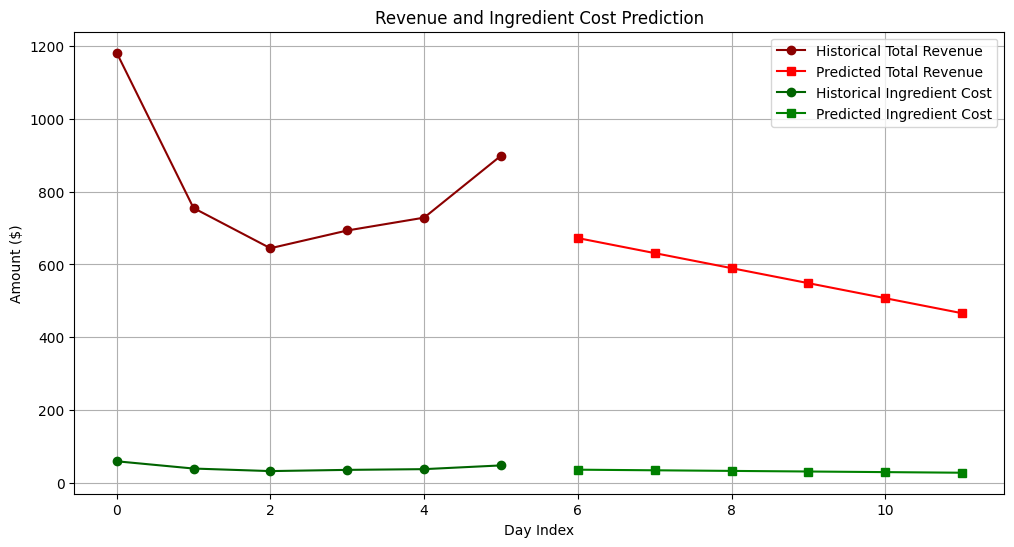

In [109]:
from sklearn.linear_model import LinearRegression
query = """
SELECT 
    O.date AS SaleDate,
    SUM(O.quantity) AS Total_Products_Sold, -- Corrected to sum the quantity of products sold per day
    SUM(IT.item_price * O.quantity) AS Total_Revenue, -- Total revenue generated from sales
    SUM((I.ing_price / I.ing_weight) * R.quantity * O.quantity) AS Total_Ingredient_Cost, -- Total cost of ingredients used
    160 AS Total_Labor_Cost, -- Fixed labor cost per day
    SUM(IT.item_price * O.quantity) - SUM((I.ing_price / I.ing_weight) * R.quantity * O.quantity) - 160 AS Net_Profit -- Final profit after subtracting costs
FROM 
    ingredients AS I 
JOIN 
    recipe AS R ON I.ing_id = R.ing_id 
JOIN 
    items AS IT ON R.recipe_id = IT.recipe_id
JOIN 
    orders AS O ON IT.item_id = O.item_id
GROUP BY 
    O.date
"""
df_query = pd.read_sql_query(query, conn)
df_query['SaleDate'] = pd.to_datetime(df_query['SaleDate'])
df_query['DayIndex'] = (df_query['SaleDate'] - df_query['SaleDate'].min()).dt.days

X = df_query[['DayIndex']]  # Features: Day index
y = df_query[['Total_Revenue', 'Total_Ingredient_Cost']]  # Targets: Total_Revenue and Total_Ingredient_Cost
model = LinearRegression()
model.fit(X, y)
future_days = pd.DataFrame({'DayIndex': [6, 7, 8, 9, 10, 11]})
predictions = model.predict(future_days)

plt.figure(figsize=(12, 6))
plt.plot(df_query['DayIndex'], df_query['Total_Revenue'], 'o-', label='Historical Total Revenue', color = '#8B0000')
plt.plot(future_days['DayIndex'], predictions[:, 0], 's-', label='Predicted Total Revenue', color='red')

plt.plot(df_query['DayIndex'], df_query['Total_Ingredient_Cost'], 'o-', label='Historical Ingredient Cost', color= '#006400')
plt.plot(future_days['DayIndex'], predictions[:, 1], 's-', label='Predicted Ingredient Cost', color='green')

plt.title('Revenue and Ingredient Cost Prediction')
plt.xlabel('Day Index')
plt.ylabel('Amount ($)')
plt.legend()
plt.grid(True)
plt.show()

#### Again, not the best results. More data is needed to make a better prediction.